
# <p style="text-align: center;  margin-bottom: -1cm;">War Machine</p>
## <p style="text-align: center; margin-bottom: 0cm;">A predictive analysis of war utilizing graph theory and support vector machine models.</p>

#### <p style="text-align: center; margin-bottom: -1cm;">Lowell Monis, Kyle Cowden, Joseph Burke, Adhvik Kolar, Saif-ur-Rehman Sheikh</p>
#### <p style="text-align: center;">November 19, 2024</p>

***

This semester project has been completed in partial fulfillment of the requirements for Computational Mathematics, Sciences, and Engineering 202, Computational Modeling Tools and Techniques, taught by Dr. Nathan Haut during the Fall of 2024.

***

## Preamble

***

This study will make use of the following Python modules, libraries, and packages. It is essential to run the following cell to avoid running into errors while viewing this notebook. The following cell also contains setup commands for styles that may be used in the notebook.

***

In [12]:
# Matplotlib Setup

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight') # Setting plot style

# Numpy Setup
import numpy as np

# Pandas Setup
import pandas as pd

# Seaborn Setup
import seaborn as sns
sns.set_context('paper')

# DateTime Setup
import time

# NetworkX Setup
import networkx as nx

# Machine Learning Setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Miscellaneous
import warnings # To hide any and all warnings and ensure for a cleaner notebook
warnings.filterwarnings('ignore')
from IPython.display import display, clear_output
rng = np.random.default_rng()
pd.options.mode.copy_on_write = True

This is an attempt to use Support Vector Machines to complete the project. This notebook is purely exploratory and is not a part of the project.

In [10]:
file_path = 'alliance_v4.1_by_directed.csv'
alliance_data = pd.read_csv(file_path)
alliance_data.head()

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1.0,0.0,4.1
1,1,235,Portugal,200,United Kingdom,1,1,1816,NaN,NaN,NaN,1,1,1,0,1.0,0.0,4.1
2,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0.0,1.0,4.1
3,2,380,Sweden,200,United Kingdom,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0.0,1.0,4.1
4,3,240,Hanover,245,Bavaria,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1.0,1.0,4.1


In [11]:
alliance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version4id      6444 non-null   int64  
 1   ccode1          6444 non-null   int64  
 2   state_name1     6444 non-null   object 
 3   ccode2          6444 non-null   int64  
 4   state_name2     6444 non-null   object 
 5   dyad_st_day     6444 non-null   int64  
 6   dyad_st_month   6444 non-null   int64  
 7   dyad_st_year    6444 non-null   int64  
 8   dyad_end_day    3252 non-null   float64
 9   dyad_end_month  3252 non-null   float64
 10  dyad_end_year   3252 non-null   float64
 11  left_censor     6444 non-null   int64  
 12  right_censor    6444 non-null   int64  
 13  defense         6444 non-null   int64  
 14  neutrality      6444 non-null   int64  
 15  nonaggression   6441 non-null   float64
 16  entente         6442 non-null   float64
 17  version         6444 non-null   f

In [14]:
# Preprocessing

# Selecting relevant columns for prediction
features = ['ccode1', 'ccode2', 'dyad_st_year', 'dyad_end_year', 
            'defense', 'neutrality', 'nonaggression', 'entente']
alliance_data = alliance_data[features]

# Handle missing values with imputation
imputer = SimpleImputer(strategy='most_frequent')
alliance_data = pd.DataFrame(imputer.fit_transform(alliance_data), columns=features)

# Create target variable: whether an alliance exists
# Assume alliance exists if any of the alliance type columns are 1
alliance_data['alliance'] = (
    (alliance_data['defense'] == 1) | 
    (alliance_data['neutrality'] == 1) | 
    (alliance_data['nonaggression'] == 1) | 
    (alliance_data['entente'] == 1)
).astype(int)

# Split data into features (X) and target (y)
X = alliance_data.drop(['alliance'], axis=1)
y = alliance_data['alliance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Support Vector Machine Model
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation
log_reg_report = classification_report(y_test, y_pred_log_reg)
svm_report = classification_report(y_test, y_pred_svm)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(log_reg_report)
print(svm_report)
print(log_reg_accuracy)
print(svm_accuracy)


              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00      1282

    accuracy                           1.00      1289
   macro avg       1.00      0.93      0.96      1289
weighted avg       1.00      1.00      1.00      1289

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00      1282

    accuracy                           1.00      1289
   macro avg       1.00      1.00      1.00      1289
weighted avg       1.00      1.00      1.00      1289

0.9992242048099301
1.0


In [17]:
import networkx as nx
from sklearn.model_selection import GridSearchCV

# Function to construct graphs from predicted alliances
def construct_graph(codes, predictions):
    """
    Construct a graph based on predicted alliances.
    :param codes: List of tuples with country codes (ccode1, ccode2).
    :param predictions: Predicted alliances for the corresponding tuples.
    :return: A NetworkX graph.
    """
    G = nx.Graph()
    for (ccode1, ccode2), pred in zip(codes, predictions):
        if pred == 1:  # Alliance exists
            G.add_edge(ccode1, ccode2)
    return G

# Fine-tuning Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 2000]
}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# Fine-tuning SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only applies to poly kernel
}
grid_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Predict alliances using the fine-tuned models
best_log_reg = grid_log_reg.best_estimator_
best_svm = grid_svm.best_estimator_

y_pred_log_reg_tuned = best_log_reg.predict(X_test)
y_pred_svm_tuned = best_svm.predict(X_test)

# Construct graphs using SVM predictions as an example
codes_test = list(zip(X_test[:, 0], X_test[:, 1]))  # Country codes for testing set
graph_svm = construct_graph(codes_test, y_pred_svm_tuned)

# Analyze stability of the graph
def analyze_graph_stability(G):
    """
    Analyze whether the graph satisfies stability conditions.
    :param G: A NetworkX graph.
    :return: Stability status (True if stable, False otherwise).
    """
    if nx.is_empty(G):  # No edges, unstable
        return False
    elif nx.number_of_edges(G) == 1:  # Single edge, stable
        return True
    elif nx.is_connected(G) and nx.number_of_edges(G) == len(G.nodes) * (len(G.nodes) - 1) // 2:
        # Complete graph, stable
        return True
    else:
        return False

stability_status = analyze_graph_stability(graph_svm)

# Results
print(grid_log_reg.best_params_)
print(grid_svm.best_params_, stability_status)


{'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}
{'C': 0.1, 'degree': 2, 'kernel': 'linear'} False


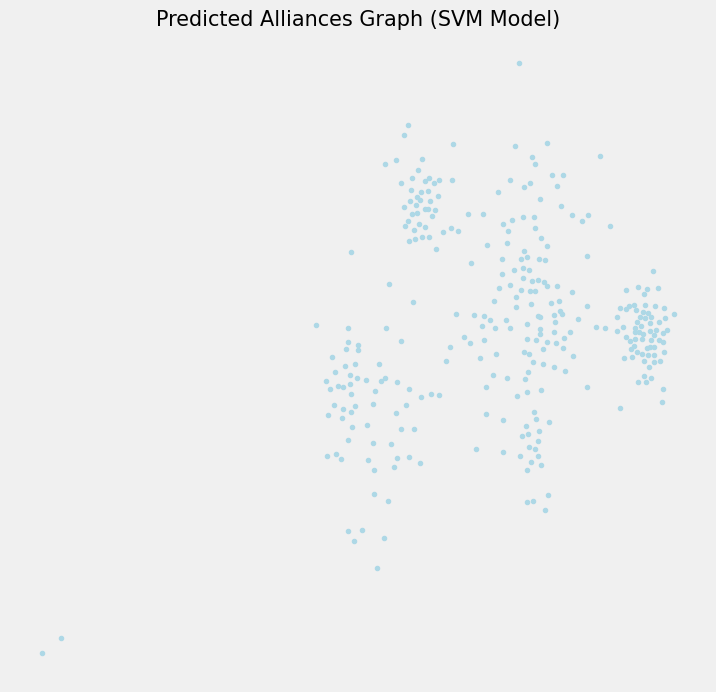

In [18]:
import matplotlib.pyplot as plt

# Function to visualize the graph
def visualize_graph(G, title="Graph Visualization"):
    """
    Visualizes a given NetworkX graph.
    :param G: A NetworkX graph.
    :param title: Title of the graph visualization.
    """
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')
 #   nx.draw_networkx_edges(G, pos, width=2.0, edge_color='gray')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# Visualize the graph constructed from SVM predictions
visualize_graph(graph_svm, title="Predicted Alliances Graph (SVM Model)")
